# Normal Distribution

## Problem Statment


### A testing agency wants to analyze the complexity of SAT Exam 2020. They have collected the SAT scores of 1000 students in "sat_score.csv". Let's answer some of the questions that will help to decide the complexity of SAT exam 2020.
### 1. Calculate the probability that a student will score less than 800 in SAT exam
### 2. Calculate the probability that a student will score more than 1300 in SAT exam
### 3. Calculate the minimum marks a student must score in order to secure 90th percentile
### 4. Calculate the minimum marks a student must score in order to be in the top 5%

In [2]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/Users/vishal/Desktop/CSV files/sat_score.csv')

In [4]:
df.head()

,student_id,score
0,1,1018
1,2,1218
2,3,611
3,4,723
4,5,541


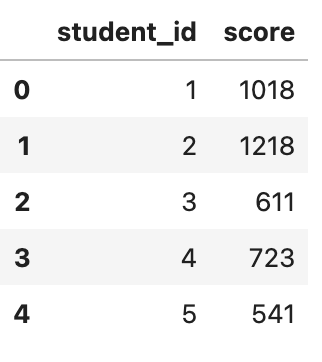

In [6]:
df.tail()

,student_id,score
995,996,871
996,997,752
997,998,1087
998,999,987
999,1000,1005


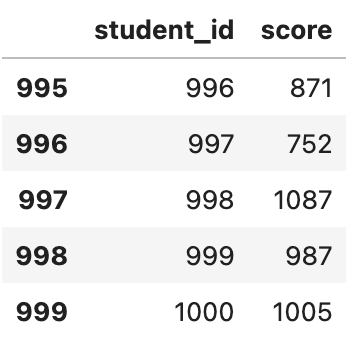

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   student_id  1000 non-null   int64
 1   score       1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


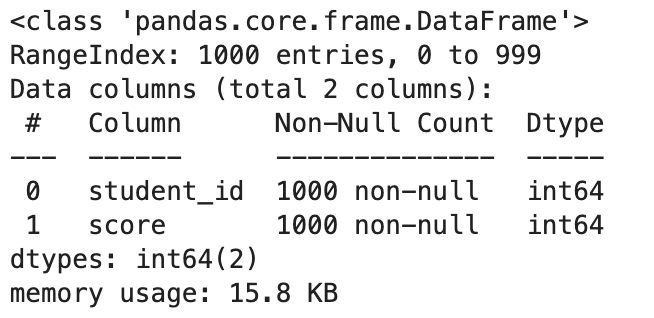

In [10]:
df.describe()

,student_id,score
count,1000.000000,1000.000000
mean,500.500000,1007.460000
std,288.819436,204.426007
min,1.000000,288.000000
25%,250.750000,873.000000
50%,500.500000,1010.000000
75%,750.250000,1148.000000
max,1000.000000,1612.000000


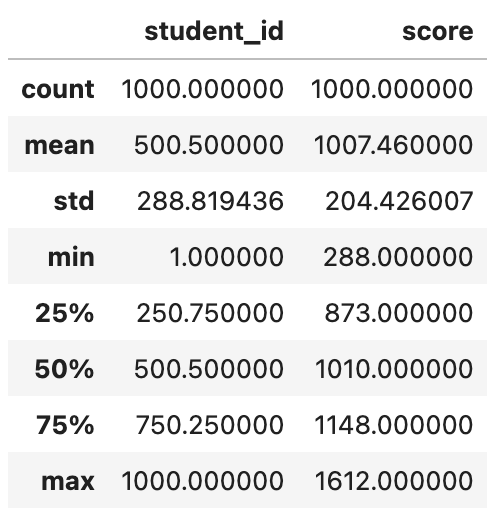

# Check the Distribution of SAT Scores

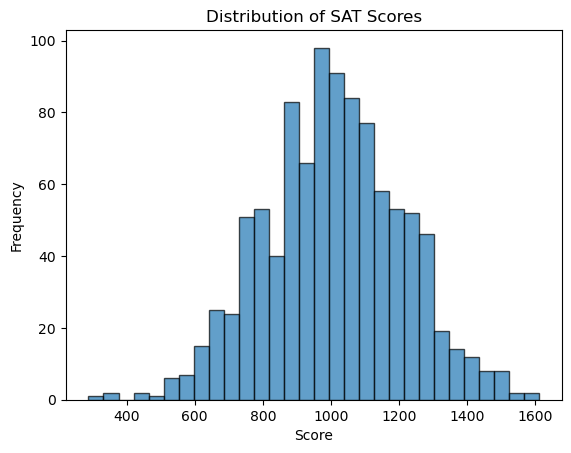

In [13]:
# Plot a histogram of the SAT scores to visualize the distribution
plt.hist(df['score'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of SAT Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()


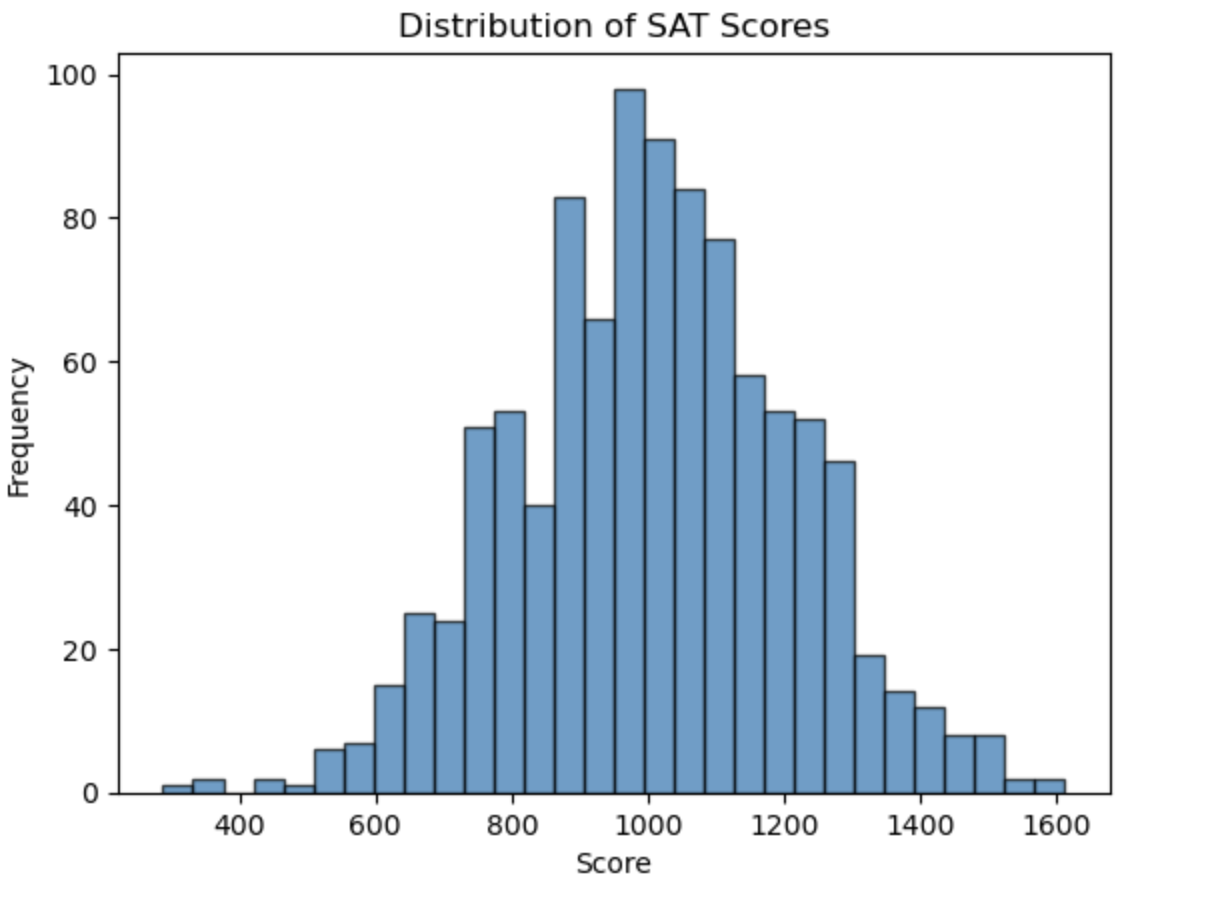

# Calculate the Mean and Standard Deviation

In [16]:
# Calculate the mean and standard deviation of the SAT scores
mean_score = df['score'].mean()
std_score = df['score'].std()

print(f"Mean SAT Score: {mean_score}")
print(f"Standard Deviation of SAT Score: {std_score}")


Mean SAT Score: 1007.46
Standard Deviation of SAT Score: 204.42600713312464


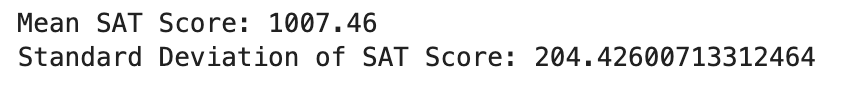

# 1. Calculate the Probability That a Student Scores Less Than 800

In [19]:
# Probability that a student scores less than 800 (P(X < 800))
prob_less_than_800 = stats.norm.cdf(800, loc=mean_score, scale=std_score)

print(f"Probability that a student scores less than 800: {prob_less_than_800}")


Probability that a student scores less than 800: 0.15509068891539862


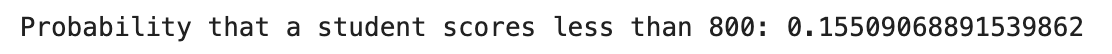

# 2. Calculate the Probability That a Student Scores More Than 1300

In [22]:
# Probability that a student scores more than 1300 (P(X > 1300))
prob_more_than_1300 = 1 - stats.norm.cdf(1300, loc=mean_score, scale=std_score)

print(f"Probability that a student scores more than 1300: {prob_more_than_1300}")


Probability that a student scores more than 1300: 0.07621063272885586


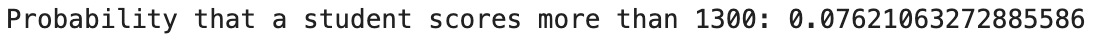

# 3. Calculate the 90th Percentile Score

In [25]:
# 90th percentile score (minimum score to be in top 10%)
percentile_90 = stats.norm.ppf(0.90, loc=mean_score, scale=std_score)

print(f"Minimum score to be in the 90th percentile: {percentile_90}")


Minimum score to be in the 90th percentile: 1269.4424694794875


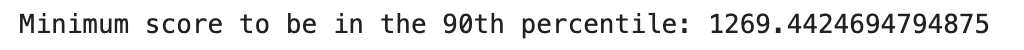

# 4. Calculate the Top 5% Score

In [28]:
# 95th percentile score (minimum score to be in top 5%)
top_5_percentile = stats.norm.ppf(0.95, loc=mean_score, scale=std_score)

print(f"Minimum score to be in the top 5%: {top_5_percentile}")


Minimum score to be in the top 5%: 1343.7108592761276


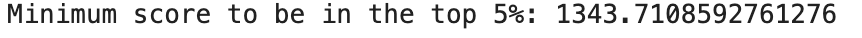

# Standardization of Normal Variables
### Suppose we know that the SAT scores are normally distributed with mean 1000 and standard deviation 200 and ACT scores are normally distributed with mean 20 and standard deviation 5.
### A college provides admission only on the basis of SAT and ACT scores. The college admin decides to give the top performer fellowship to the student who has performed the best among all applicants. The highest score received from applicants who appeared for SAT is 1350 and the highest score received from applicants who appeared for ACT is 30.
### Help the college to choose the best candidate for the fellowship!


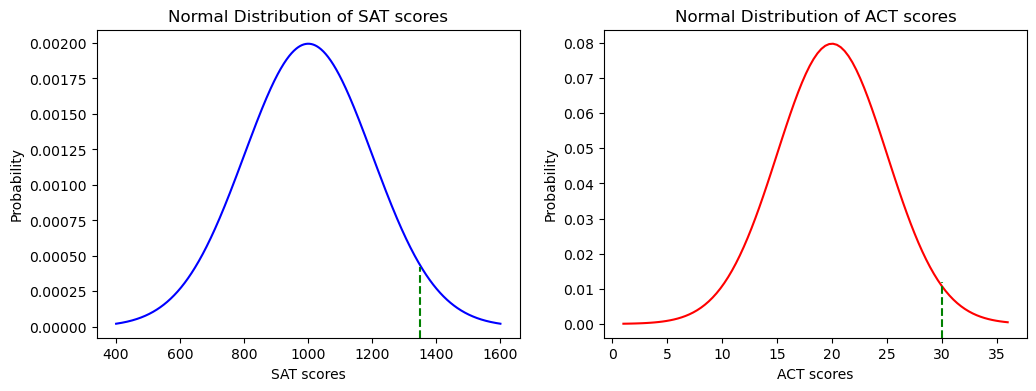

In [31]:
# plot the two distributions for SAT and ACT scores
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# SAT scores (Normal Distribution)
x = np.linspace(400, 1600, 1000)
ax1.plot(x, norm.pdf(x, loc=1000, scale=200), color='b')
ax1.set_title('Normal Distribution of SAT scores')
ax1.set_xlabel('SAT scores')
ax1.set_ylabel('Probability')
ax1.axvline(1350, ymax=0.23, linestyle='--', color='green')

# ACT scores (Normal Distribution)
x1 = np.linspace(1, 36, 100)
ax2.plot(x1, norm.pdf(x1, loc=20, scale=5), color='r')
ax2.set_title('Normal Distribution of ACT scores')
ax2.set_xlabel('ACT scores')
ax2.set_ylabel('Probability')
ax2.axvline(30, ymax=0.18, linestyle='--', color='green')

# Show the plot
plt.show()


### In the above plot, the blue curve represents the distribution of SAT scores and the red curve represents the distribution of ACT scores. The highest scores of the applicants in SAT and ACT exams are dotted with green lines in the respective distributions. However, it is difficult for us to compare the raw highest scores in the above plot. Thus, we need to standardize the two scores and compare their Z-scores.

In [56]:
# find the Z-score of highest scorer in SAT among all the applicants
top_sat = (1350 - 1000) / 200
print('The Z-score of highest scorer in SAT among all the applicants', top_sat)
# find the Z-score of highest scorer in ACT among all the applicants
top_act = (30 - 20) /5
print('The Z-score of highest scorer in ACT among all the applicants', top_act)


The Z-score of highest scorer in SAT among all the applicants 1.75
The Z-score of highest scorer in ACT among all the applicants 2.0


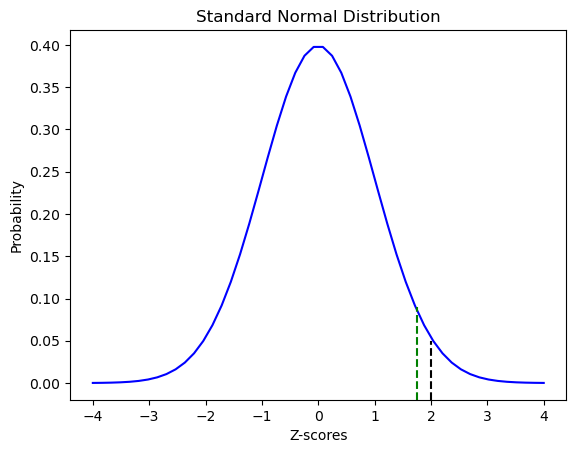

In [53]:
# Example values for top SAT and ACT z-scores
top_sat = 1.75  # Replace with actual standardized value for SAT
top_act = 2.  # Replace with actual standardized value for ACT

# Plot the standard normal distribution
# and visualize the standardized scores
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots()

# Generate values for the x-axis (Z-scores)
x = np.linspace(-4, 4, 50)

# Plot the standard normal distribution (mean=0, std=1)
ax.plot(x, norm.pdf(x, loc=0, scale=1), color='b')
ax.set_title('Standard Normal Distribution')
ax.set_xlabel('Z-scores')
ax.set_ylabel('Probability')

# Add vertical lines for SAT and ACT standardized scores
ax.axvline(top_sat, ymax=0.25, linestyle='--', color='green')  # SAT
ax.axvline(top_act, ymax=0.16, linestyle='--', color='black')  # ACT

# Show the plot
plt.show()
